<a href="https://colab.research.google.com/github/kresnaj/machinelearning-endproject-dicodingcourse/blob/google-colab/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Joshua%20Kresna%20Kusmono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
df = pd.read_csv('YoutubeCommentDataset.csv')

# **3. Data Splitting**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Comment'])

X = df['Comment']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Data yang ditraining:", len(x_train), "\nData yang ditest:", len(x_test))

Data yang ditraining: 14296 
Data yang ditest: 3575


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
SVC_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', SVC())
])

RandomForest_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

SVC_model.fit(X_train, y_train)
RandomForest_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

Saya menggunakan dua model sebagai pembanding nantinya. Untuk model yang saya pakai yaitu pertama SVC dan kedua Random Forest. Karena dalam dataset terdapat tiga sentimen user negative, neutral, dan positive, maka menurut saya dua model ini cocok untuk kebutuhan klasifikasi sentimen user terhadap youtube. Pada Dataset menggunakan tipe data objek, yang mana scikit-learn terutama di bagian Klasifikasi hanya bisa menerima nilai numeric. Maka saya menggunakan tfidfVectorized (menjadikan numeric berdasarkan kepentingan kata seperti suka/tidak suka), karena target saya adalah mengelompokkan sentimen user terhadap youtube.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

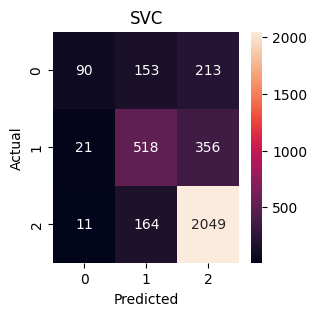

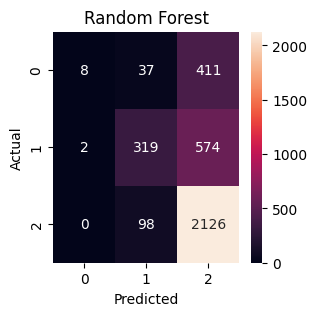

           Model   Akurasi   Presisi    Recall   Skor_F1
0            SVC  0.743217  0.736293  0.743217  0.716152
1  Random Forest  0.686154  0.703079  0.686154  0.618593


In [92]:
predict_with_SVC = SVC_model.predict(X_test)
predict_with_FR = RandomForest_model.predict(X_test)

def evaluate_score(model, X_test, y_test, model_name):
  y_pred = model.predict(X_test)
  conix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(3,3))
  sb.heatmap(conix, annot=True, fmt='d')
  plt.title(model_name)
  plt.ylabel('Aktual')
  plt.xlabel('Prediksi')
  plt.show()
  results = {
      'Confusion Matrix': conix,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred, average='weighted'),
      'Recall': recall_score(y_test, y_pred, average='weighted'),
      'F1 Score': f1_score(y_test, y_pred, average='weighted')
  }
  return results

model_selection = {
    'SVC': evaluate_score(SVC_model, X_test, y_test, 'SVC'),
    'Random Forest': evaluate_score(RandomForest_model, X_test, y_test, 'Random Forest')
}

summary_score_df = pd.DataFrame(columns=['Model', 'Akurasi', 'Presisi', 'Recall', 'Skor_F1'])

rows = []
for model_name, metrics in model_selection.items():
  rows.append({
      'Model': model_name,
      'Akurasi': metrics['Accuracy'],
      'Presisi': metrics['Precision'],
      'Recall': metrics['Recall'],
      'Skor_F1': metrics['F1 Score']
  })

summary_score_df = pd.DataFrame(rows)
print(summary_score_df)



Dari hasil ini, setelah dua model ini melakukan prediksi. Terlihat bahwa Model SVC dengan Akurasi 74%, Presisi 73%, Recall 74% dan Skor F1 71%. Sedangkan Random Forest sedikit di bawah SVC yaitu Akurasi 68%, Presisi 70%, Recall 68%, dan Skor F1 61%. Dari Heatmap ini terlihat pada bagian model SVC, terdapat 90 Komentar negatif dari 456 yang diprediksi benar, 518 Komentar netral dari 895 yang diprediksi benar, dan 2156 Komentar positif dari 2224 diprediksi benar. Sedangkan Random Forest hanya 8 komentar negatif diprediksi benar, 319 komentar netral diprediksi benar, dan 2126 komentar positif diprediksi benar. Dengan kesimpulan bahwa SVC buruk dalam menangkap komentar negatif saja, sedangkan Random Forest buruk pada bagian komentar negatif dan komentar netral.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.